**Aviation Accident Risk Assessment: Analyzing Aircraft Safety**

For this project, I will be working with a [dataset](https://www.kaggle.com/datasets/khsamaha/aviation-accident-database-synopses/data) sourced from the National Transportation Safety Board (NTSB), which contains information on aviation accidents that occurred between 1962 and 2022. The dataset includes several key attributes, such as:

**Aircraft.Type:** The model of the aircraft involved in the accident.

**Event.Date:** The specific date when the accident took place.

**Location:** The geographic location where the accident occurred.

**Weather.Condition:** The weather conditions present at the time of the accident.

**Total.Fatal.Injuries:** The total number of fatalities resulting from the accident.

The project will follow these main steps:

**Data Cleaning:** This involves handling missing values and ensuring data consistency.

**Exploratory Data Analysis (EDA):** I will examine patterns in the data related to aircraft types, locations, and weather conditions.


**Data Visualization:** Various visual tools will be created to present the findings clearly.

**Business Insights:** Based on the analysis, I will generate recommendations to help guide decisions in the aviation industry.


In [ ]:
#Importing necessary Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Loading AviationData.csvinto pandas DataFrames.

In [ ]:
# Loading the aviation data (Unfortunately I had to use the encoding because it was giving me an error when I was reading the file like I was shown in the  course work)
aviation_df = pd.read_csv("AviationData.csv", encoding='ISO-8859-1')


**Step 1: Data Cleaning**

Before performing any analysis, I need to clean the data. This involves:
- **Handling missing values**: I need to check if any data is missing and decide how to handle it (by either removing or filling the missing data).
- **Ensuring correct data types**: For example, the `Event.Date` column should be in **datetime** format, and columns like `Latitude` and `Longitude` should be numeric.

I will perform these steps to ensure the dataset is clean and ready for analysis.

In [ ]:
# Replace placeholder values ("-") with NaN
aviation_df.replace("-", np.nan, inplace=True)

# Check the number of missing values in each column
print("Missing values before cleaning:")
print(aviation_df.isnull().sum())

# Drop rows with missing values
aviation_df_cleaned = aviation_df.dropna()

# Confirm the dataset size after cleaning
print(f"Dataset size after cleaning: {aviation_df_cleaned.shape}")

# Convert data types where necessary
aviation_df_cleaned['Event.Date'] = pd.to_datetime(aviation_df_cleaned['Event.Date'], errors='coerce')
aviation_df_cleaned['Latitude'] = pd.to_numeric(aviation_df_cleaned['Latitude'], errors='coerce')
aviation_df_cleaned['Longitude'] = pd.to_numeric(aviation_df_cleaned['Longitude'], errors='coerce')

# Checking for invalid dates
if aviation_df_cleaned['Event.Date'].isnull().any():
    print("Warning: Some dates could not be parsed. These rows may need further investigation.")

# Checking for invalid or missing coordinates
missing_coords = aviation_df_cleaned[['Latitude', 'Longitude']].isnull().any(axis=1).sum()
if missing_coords > 0:
    print(f"Warning: {missing_coords} rows have missing or invalid coordinates.")

# Ensure no placeholder values are left
if "-" in aviation_df_cleaned.values:
    print("Some placeholder values ('-') still exist in the dataset.")
else:
    print("All placeholder values have been successfully replaced.")

# Displaying a preview of the cleaned dataset
print("Preview of the cleaned data:")
print(aviation_df_cleaned.head())


**Step 2:** **Exploratory Data Analysis (EDA)**

In the EDA phase, I will examine the data to find patterns, trends, or relationships.

**Key Questions for EDA:**


1.   Which aircraft types are most involved in accidents?
2.   How do weather conditions affect accident rates?
3.   What time periods or locations show the most accidents?


Analyzing which aircraft types are most involved in accidents. This will help identify if certain aircraft types have higher accident rates.

In [ ]:
# Groups by aircraft make and count the number of accidents
accidents_by_type = aviation_df_cleaned.groupby('Make')['Event.Id'].count()

# Sort results in descending order to show the most accident-prone aircraft types
accidents_by_type = accidents_by_type.sort_values(ascending=False)

# Displays the top 10 aircraft makes with the highest number of accidents
print("Top 10 aircraft makes with the most accidents:")
print(accidents_by_type.head(10))

In [ ]:
# Check if dataset is empty
if aviation_df_cleaned.empty:
    print("The dataset is empty after cleaning. Please check the data cleaning process.")
else:
    # Group by aircraft make and count the number of accidents
    if 'Make' in aviation_df_cleaned.columns and 'Event.Id' in aviation_df_cleaned.columns:
        accidents_by_type = aviation_df_cleaned.groupby('Make')['Event.Id'].count()
        
        # Sort results in descending order
        accidents_by_type = accidents_by_type.sort_values(ascending=False)
        
        # Display results if there are any
        if not accidents_by_type.empty:
            print("Top 10 aircraft makes with the most accidents:")
            print(accidents_by_type.head(10))
        else:
            print("No accident data available for grouping.")
    else:
        print("Columns 'Make' or 'Event.Id' are missing in the dataset. Please check your data.")

In [ ]:
# Fill missing values for 'Make' with "Unknown"
aviation_df_cleaned['Make'] = aviation_df_cleaned['Make'].fillna('Unknown')

# Fill missing 'Event.Id' values with 0, or leave them as NaN
aviation_df_cleaned['Event.Id'] = aviation_df_cleaned['Event.Id'].fillna(0)

# Check the dataset's shape after filling missing values
print(f"Dataset shape after filling missing values: {aviation_df_cleaned.shape}")

# Quick check for any remaining missing values
print("Remaining missing values in each column:")
print(aviation_df_cleaned.isnull().sum())

In [ ]:
#Reading the dataset again and checking its shape
aviation_df_raw = pd.read_csv("AviationData.csv" ,encoding='ISO-8859-1')

print(aviation_df_raw.shape)
aviation_df_raw.head()

In [ ]:
# Checking for missing values in the 'Make' and 'Event.Id' columns
print("Checking for missing values in critical columns:")
missing_values = aviation_df_raw[['Make', 'Event.Id']].isnull().sum()
print(missing_values)

In [ ]:
# Display all column names to verify the dataset structure
print("\nColumn names in the dataset:")
print(aviation_df_raw.columns.tolist())

In [ ]:
# Fill missing values: 'Unknown' for 'Make', and 0 for 'Event.Id'
aviation_df_cleaned = aviation_df_raw.fillna({'Make': 'Unknown', 'Event.Id': 0})

# Print the shape of the dataset after filling missing values
print(f"Dataset shape after filling missing values: {aviation_df_cleaned.shape}")

# Preview the first few rows of the cleaned dataset
print("\nPreview of the cleaned dataset:")
print(aviation_df_cleaned.head())

Analyzing Accidents by Aircraft Make 

I will group the data by Make and count the number of accidents per aircraft manufacturer.


In [ ]:
# Group by aircraft make and count the number of accidents
accidents_by_make = aviation_df_cleaned.groupby('Make')['Event.Id'].count()

# Sort the results in descending order to find the most accident-prone aircraft makes
accidents_by_make = accidents_by_make.sort_values(ascending=False)

# Display the top 10 aircraft makes with the most accidents
print("Top 10 aircraft makes with the most accidents:")
print(accidents_by_make.head(10))

Visualizing Accidents by Aircraft Make, using a bar chart.

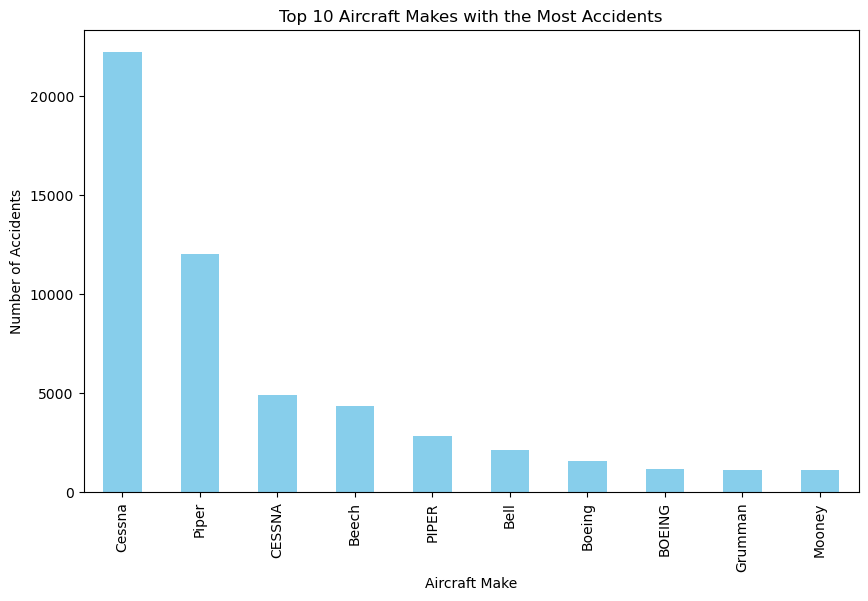

In [66]:
# Plot the top 10 aircraft makes with the most accidents
accidents_by_make.head(10).plot(kind='bar', figsize=(10, 6), color='skyblue')

# Add meaningful titles and labels
plt.title('Top 10 Aircraft Makes with the Most Accidents')
plt.xlabel('Aircraft Make')
plt.ylabel('Number of Accidents')

plt.show()

Analyze Accidents by Weather Condition


In [ ]:
# Grouping by weather condition and count the number of accidents
accidents_by_weather = aviation_df_cleaned.groupby('Weather.Condition')['Event.Id'].count()

# Sorting the results in descending order to find the most common weather conditions for accidents
accidents_by_weather = accidents_by_weather.sort_values(ascending=False)

# Displaying the top 10 weather conditions with the most accidents
print("\nTop 10 weather conditions associated with the most accidents:")
print(accidents_by_weather.head(10))

Data Visualization for Weather Conditions using bar chart


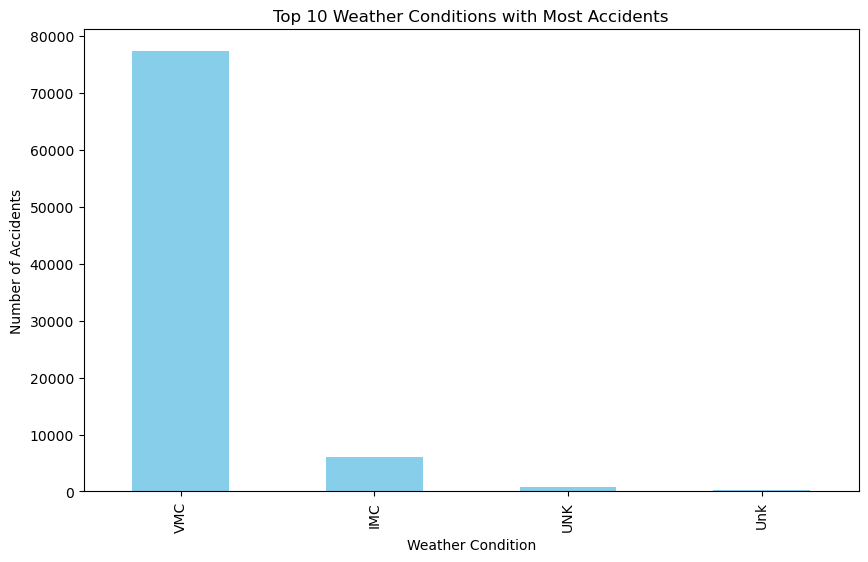

In [64]:
# Ploing the top 10 weather conditions with the most accidents
accidents_by_weather.head(10).plot(kind='bar', figsize=(10, 6), color='skyblue')

# Add chart title and axis labels
plt.title('Top 10 Weather Conditions with Most Accidents')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Accidents')

plt.show()

Further Analysis by Location or Year

1. Accidents by Year:

Looking at trends over time by grouping accidents by year. This might show if there is a rise or fall in the number of accidents over the yers.


In [ ]:
# Extracting the year from the 'Event.Date' column
aviation_df_cleaned['Year'] = pd.to_datetime(aviation_df_cleaned['Event.Date'], errors='coerce').dt.year

# Grouping by year and count the number of accidents
accidents_by_year = aviation_df_cleaned.groupby('Year')['Event.Id'].count()

# Displaying the top 10 years with the most accidents
print("Top 10 years with the most accidents:")
print(accidents_by_year.sort_values(ascending=False).head(10))

2. Accidents by Location (e.g., State or Country):

Analyzing how accidents are distributed across different locations (e.g., by state or country).

In [ ]:
# Grouping by location (Country) and count the number of accidents
accidents_by_location = aviation_df_cleaned.groupby('Country')['Event.Id'].count()

# Sorting the results in descending order and display the top 10 locations with the most accidents
print("\nTop 10 countries with the most accidents:")
print(accidents_by_location.sort_values(ascending=False).head(10))


Recommendation

Aircraft Types: Avoid high-risk aircraft makes (e.g., Cessna, Piper) or invest in newer models with fewer accidents.

Weather: Improve weather preparedness through training, real-time monitoring, and operational adjustments in extreme weather conditions.

Location: Focus on high-risk areas with additional safety measures, route adjustments, and infrastructure improvements.